<a href="https://colab.research.google.com/github/forrestpark/MachineLearning/blob/main/Alzheimer's_Disease_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Introduction**
###### This python program compares and analyzes features of three diagnostic groups of the Alzheimer's disease (Class 0: Cognitively Normal; Class 1: Mild Cognitive Impairment; Class 2: Alzheimer's Disease). The program executes the aforementioned task by calculating univariate and bivariate Gaussian estimations.



###### The below cell uploads **alzheimers_disease_dataset.csv** as data file, but I have mounted the necessary csv file via mounting Google Drive and/or importing it from GitHub.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving alzheimers_disease_dataset.csv to alzheimers_disease_dataset (1).csv


###### This function is a self-written function of **mean** calculation


In [ ]:
def mean(data):
  n = len(data)
  mean = sum(data) / n
  return mean

###### Below is a function for calculating the **univariate Gaussian distribution**


In [ ]:
def univariate_gaussian(x, mean, variance):
  return np.exp(-(x-mean)**2/(2*variance)) / (np.sqrt(2 * np.pi * variance))

### Univariate Gaussian Distribution: Hippocampus

###### The program below calculates the **univariate** Gaussian distribution of **Hippocampus** of each diagnostic group, hence three in total.

### **Analysis**

###### The grpah drawn below indicates that Group 0, the cognitively normal, maintains the greatest cortical volume of Hippocampus, whereas Group 2, the group of individiuals suffering from the Alzheimer's disease, carries the least. From the above pattern, one can assume that those who suffer from Alzheimer's is more likely to have less cortical volume of Hippocampus. This data analysis corresponds to what we know about the Alzheimer's disease until now; patients suffering from the Disease experiences memory deterioration, and it is known that Hippocampus is a part of the brain closely related to memory capacity and memory-related activities, such as memory consolidation and memory encoding.

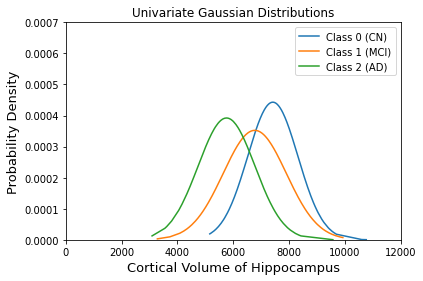

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import csv
from google.colab import drive

f = open("/content/drive/My Drive/Hopkins/Fall '20/Korea University/BNCS411 Brain and Machine Learning/alzheimers_disease_dataset.csv", 'r', encoding='utf-8')
rdr = csv.reader(f)
header = next(rdr)

count0 = 0
count1 = 0
count2 = 0

list0 = []
list1 = []
list2 = []

for line in rdr:
  if line[1] == '0':
    list0.append(int(line[2]))
    count0 += 1
  elif line[1] == '1':
    list1.append(int(line[2]))
    count1 += 1
  else:
    list2.append(int(line[2]))
    count2 += 1

mean0 = sum(list0) / count0
mean1 = sum(list1) / count1
mean2 = sum(list2) / count2

f.close()

array0 = np.array(sorted(list0))
array1 = np.array(sorted(list1))
array2 = np.array(sorted(list2))
plt.plot(array0, univariate_gaussian(array0, mean = mean(array0), variance=np.var(array0)), label = 'Class 0 (CN)')
plt.plot(array1, univariate_gaussian(array1, mean = mean(array1), variance=np.var(array1)), label = 'Class 1 (MCI)')
plt.plot(array2, univariate_gaussian(array2, mean = mean(array2), variance=np.var(array2)), label = 'Class 2 (AD)')
plt.legend(loc=1)
plt.xlabel('Cortical Volume of Hippocampus', fontsize=13)
plt.ylabel('Probability Density', fontsize = 13)
plt.ylim([0, 0.0007])
plt.xlim([0, 12000])
plt.title('Univariate Gaussian Distributions')
plt.savefig('univariate_gaussian_distribution_hippocampus.png')
plt.show()


### Univariate Gaussian Distribution: Entorhinal Cortex

###### The program below calculates the **univariate** Gaussian distribution of **Entorhinal cortex** of each diagnostic group, hence three in total.

### **Analysis**

###### According to the grpah below, Group 0, the cognitively normal, maintains the least cortical volume of the Entorhinal cortex, whereas Group 2 maintains the most. We can hereby make an educated guess that, as the Alzheimer's Disease develops, patients lose cortical volume of Entorhinal cortex. The entorhinal cortex is known as an area of the brain that functions as a hub in a widespread network for memory. As Alzheimer's Disease typically destroys neurons in part of the brain involved in memory, this data analysis corresponds to what is known as symptoms of the Disease.

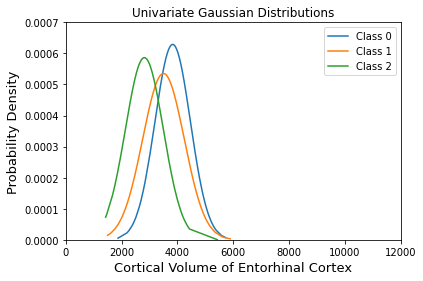

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import csv

from google.colab import drive

f = open("/content/drive/My Drive/Hopkins/Fall '20/Korea University/BNCS411 Brain and Machine Learning/alzheimers_disease_dataset.csv", 'r', encoding='utf-8')
rdr = csv.reader(f)
header = next(rdr)

count0 = 0
count1 = 0
count2 = 0

list0 = []
list1 = []
list2 = []

for line in rdr:
  if line[1] == '0':
    list0.append(int(line[3]))
    count0 += 1
  elif line[1] == '1':
    list1.append(int(line[3]))
    count1 += 1
  else:
    list2.append(int(line[3]))
    count2 += 1

mean0 = sum(list0) / count0
mean1 = sum(list1) / count1
mean2 = sum(list2) / count2

f.close()

array0 = np.array(sorted(list0))
array1 = np.array(sorted(list1))
array2 = np.array(sorted(list2))
plt.plot(array0, univariate_gaussian(array0, mean = mean(array0), variance=np.var(array0)), label = 'Class 0')
plt.plot(array1, univariate_gaussian(array1, mean = mean(array1), variance=np.var(array1)), label = 'Class 1')
plt.plot(array2, univariate_gaussian(array2, mean = mean(array2), variance=np.var(array2)), label = 'Class 2')
plt.legend(loc=1)
plt.xlabel('Cortical Volume of Entorhinal Cortex', fontsize=13)
plt.ylabel('Probability Density', fontsize = 13)
plt.ylim([0, 0.0007])
plt.xlim([0, 12000])
plt.title('Univariate Gaussian Distributions')
plt.savefig('univariate_gaussian_distribution_entorhinal.png')
plt.show()


###### This function below is a helper function for drawing a **multivariate Gaussian distribution** graph.

In [ ]:
def plot_surface(xmin, xmax, ymin, ymax, mean, covariance, dim):

  grid_size = 100
  x_space = np.linspace(0, 12000, grid_size)
  y_space = np.linspace(0, 6000, grid_size)
  mesh_x, mesh_y = np.meshgrid(x_space, y_space)
  pdf = np.zeros((grid_size, grid_size))
  for i in range(grid_size):
    for j in range(grid_size):
      pdf[i,j] = multivariate_gaussian(np.matrix([ [mesh_x[i,j]], [mesh_y[i,j]] ]), dim, mean, covariance)

  return mesh_x, mesh_y, pdf

###### This function calculates the **multivariate MLE**.

In [ ]:
def multivariate_gaussian(x, d, mean, covariance):
  dist_mean = x - mean
  det = np.linalg.det(covariance)
  return (1. / (np.sqrt((2 * np.pi)**d * det)) * np.exp(-(np.linalg.solve(covariance, dist_mean).T.dot(dist_mean)) / 2))

### Bivariate Gaussian Distribution (Hippocampus/Entorhinal Cortex)

###### The program below calculates **miltivariate** Gaussian distribution of Hippocampus and Entorhinal cortex of each diagnostic group and draw one two-dimensional multivariate Gaussian distribution graph per diagnostic group, hence three in total.

### **Analysis**

###### As one can find commonly in all three graphs, the cortical volume of Hippocampus and entorhinal cortex is positively related. The correlations between the volume of both regions of the brain of all three groups (Group 0, 1, 2) seem to be analogous to each other. From the grpahs below, one can infer that, regardless of which group out of the three a certain individual is a part of, the greater the cortical volume of Hippocampus, more likely that that of the entorhinal cortex is larger, and vice versa. Also, patients who maintain less volume of Hippocampus is more likely to maintain less volume of the entorhinal, and vice versa.

Text(0.5, 1.0, 'Class 2: AD')

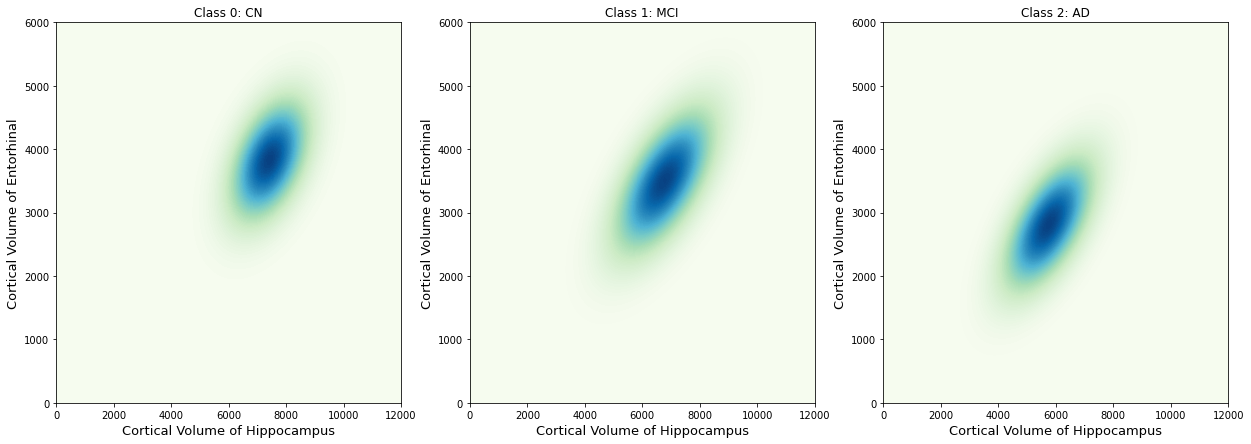

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import csv

"""datafile = pd.read_csv(io.StringIO(uploaded['alzheimers_disease_dataset.csv'].decode('utf-8')))"""

url = 'https://raw.githubusercontent.com/pjwoo3/BNCS411/main/alzheimers_disease_dataset.csv'
datafile = pd.read_csv(url)
del datafile['ID']

is_class0 = datafile['Class']==0
is_class1 = datafile['Class']==1
is_class2 = datafile['Class']==2
class0 = datafile[is_class0]
class1 = datafile[is_class1]
class2 = datafile[is_class2]

cov0 = class0.cov()
del cov0['Class']
cov0 = cov0.drop(['Class'])

cov1 = class1.cov()
del cov1['Class']
cov1 = cov1.drop(['Class'])

cov2 = class2.cov()
del cov2['Class']
cov2 = cov2.drop(['Class'])

class0_hip = class0['Hippocampus']
class1_hip = class1['Hippocampus']
class2_hip = class2['Hippocampus']
class0_ent = class0['Entorhinal']
class1_ent = class1['Entorhinal']
class2_ent = class2['Entorhinal']

hip0_min, hip0_max = class0_hip.min(), class0_hip.max()
hip1_min, hip1_max = class1_hip.min(), class1_hip.max()
hip2_min, hip2_max = class2_hip.min(), class2_hip.max()
ent0_min, ent0_max = class0_ent.min(), class0_ent.max()
ent1_min, ent1_max = class1_ent.min(), class1_ent.max()
ent2_min, ent2_max = class2_ent.min(), class2_ent.max()

sum0_hip = class0_hip.sum() 
sum1_hip = class1_hip.sum()
sum2_hip = class2_hip.sum()
sum0_ent = class0_ent.sum()
sum1_ent = class1_ent.sum()
sum2_ent = class2_ent.sum()

mean0_hip = sum0_hip / len(class0_hip)
mean1_hip = sum1_hip / len(class1_hip)
mean2_hip = sum2_hip / len(class2_hip)
mean0_ent = sum0_ent / len(class0_ent)
mean1_ent = sum1_ent / len(class1_ent)
mean2_ent = sum2_ent / len(class2_ent)

mean0_matrix = np.matrix([[mean0_hip], [mean0_ent]])
mean1_matrix = np.matrix([[mean1_hip], [mean1_ent]])
mean2_matrix = np.matrix([[mean2_hip], [mean2_ent]])

del class0['Class']
del class1['Class']
del class2['Class']

dimension = 2

x1, y1, p1 = plot_surface(hip0_min, hip0_max, ent0_min, ent0_max, mean0_matrix, cov0, dimension)
x2, y2, p2 = plot_surface(hip1_min, hip1_max, ent1_min, ent1_max, mean1_matrix, cov1, dimension)
x3, y3, p3 = plot_surface(hip2_min, hip2_max, ent2_min, ent2_max, mean2_matrix, cov2, dimension)

figure, (graph1, graph2, graph3) = plt.subplots(1, 3, figsize=(21,7))

graph1.contourf(x1, y1, p1, 100, cmap='GnBu')
graph1.set_xlabel('Cortical Volume of Hippocampus', fontsize=13)
graph1.set_ylabel('Cortical Volume of Entorhinal', fontsize=13)
graph1.set_title('Class 0: CN', fontsize=12)

graph2.contourf(x2, y2, p2, 100, cmap='GnBu')
graph2.set_xlabel('Cortical Volume of Hippocampus', fontsize=13)
graph2.set_ylabel('Cortical Volume of Entorhinal', fontsize=13)
graph2.set_title('Class 1: MCI', fontsize=12)

graph3.contourf(x3, y3, p3, 100, cmap='GnBu')
graph3.set_xlabel('Cortical Volume of Hippocampus', fontsize=13)
graph3.set_ylabel('Cortical Volume of Entorhinal', fontsize=13)
graph3.set_title('Class 2: AD', fontsize=12)
